# Analiza Kapsztadu

In [100]:
import math
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.impute import SimpleImputer
from IPython.display import display, Markdown
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## 1, Załadowanie danych

In [41]:
raw_df = pd.read_csv('http://data.insideairbnb.com/south-africa/wc/cape-town/2023-12-26/data/listings.csv.gz', sep=',', encoding='utf-8')
clean_df = raw_df.copy() # Kopiujemy aby na tej dokonac czyszczenia danych

## 2. Określenie rozmiaru danych

#### Ile jest rzędów?

In [42]:
clean_df.shape[0]

22966

#### Ile jest kolumn?

In [43]:
clean_df.shape[1]

75

## 3. Szybkie rozeznanie się w kształcie danych

#### Jak wygląda nagłówek?raw_df.head()

In [44]:
clean_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20231226203914,2023-12-27,city scrape,Home in Southern Suburbs · ★4.81 · 1 bedroom ·...,NaN,"Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.76,4.79,NaN,t,1,1,0,0,0.58
1,743795,https://www.airbnb.com/rooms/743795,20231226203914,2023-12-28,previous scrape,Townhouse in Cape Town · 1 bedroom · 1 bed · 1...,NaN,From the recently renovated Woodstock Exchange...,https://a0.muscache.com/pictures/miso/Hosting-...,3897359,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,15007,https://www.airbnb.com/rooms/15007,20231226203914,2023-12-27,city scrape,Home in Cape Town · ★4.82 · 3 bedrooms · 4 bed...,NaN,"Bloubergstrand is a lovely, cosy suburb near C...",https://a0.muscache.com/pictures/3b654aa4-248e...,59072,...,4.96,4.93,4.84,NaN,f,3,3,0,0,0.37
3,751785,https://www.airbnb.com/rooms/751785,20231226203914,2023-12-28,city scrape,Rental unit in Cape Town · ★4.0 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2516345,...,4.00,4.62,4.23,NaN,f,83,68,15,0,0.11
4,754780,https://www.airbnb.com/rooms/754780,20231226203914,2023-12-28,previous scrape,Rental unit in Cape Town · 1 bedroom · 1 bed ·...,NaN,NaN,https://a0.muscache.com/pictures/10463914/a5d8...,3971841,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


#### Jakie są kolumny?

In [45]:
for col, dtype in zip(clean_df.columns, clean_df.dtypes):
    print(f"{col}: {dtype}")

id: int64
listing_url: object
scrape_id: int64
last_scraped: object
source: object
name: object
description: float64
neighborhood_overview: object
picture_url: object
host_id: int64
host_url: object
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: object
host_is_superhost: object
host_thumbnail_url: object
host_picture_url: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
neighbourhood: object
neighbourhood_cleansed: object
neighbourhood_group_cleansed: float64
latitude: float64
longitude: float64
property_type: object
room_type: object
accommodates: int64
bathrooms: float64
bathrooms_text: object
bedrooms: float64
beds: float64
amenities: object
price: object
minimum_nights: int64
maximum_nights: int64
minimum_minimum_nights: float64
maximum_minimu

### Które kolumny są przydatne? 
### Wstępne typowanie

name - możemy analizować ile i jakich słów użyto

neighborhood_overview - podobnie jak wyżej

host_since - możemy analizować od jak dawna użytkownicy są na platformie

host_location - możemy analizować, czy gospodarz jest z tego samego miasta co ogłoszenie

host_about - możemy analizować ile i jakich słów użyto

host_response_time

host_response_rate

host_acceptance_rate

host_is_superhost

host_listings_count

host_total_listings_count

host_verifications

host_has_profile_pic

host_identity_verified

neighbourhood

neighbourhood_cleansed

latitude

longitude

property_type

room_type

accommodates

bathrooms_text

bedrooms

beds

amenities

price

minimum_nights

maximum_nights

minimum_minimum_nights

maximum_minimum_nights

minimum_maximum_nights

maximum_maximum_nights

minimum_nights_avg_ntm

maximum_nights_avg_ntm

has_availability

availability_30

availability_60

availability_90

availability_365

number_of_reviews

number_of_reviews_ltm

number_of_reviews_l30d

first_review

last_review

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

instant_bookable

calculated_host_listings_count

calculated_host_listings_count_entire_homes

calculated_host_listings_count_private_rooms

calculated_host_listings_count_shared_rooms

reviews_per_month

## 4. Weryfikacja typów zmiennych

#### Ustalenie właściwych typów kolumn

In [46]:
correct_types = {
    'id': np.int64,
    'listing_url': 'string',
    'scrape_id': np.int64,
    'last_scraped': 'datetime64',
    'source': 'string',
    'name': 'string',
    'description': 'string',
    'neighborhood_overview': 'string',
    'picture_url': 'string',
    'host_id': np.int64,
    'host_url': 'string',
    'host_name': 'string',
    'host_since': 'datetime64',
    'host_location': 'string',
    'host_about': 'string',
    'host_response_time': 'category',
    'host_response_rate': np.float64,
    'host_acceptance_rate': np.float64,
    'host_is_superhost': 'boolean',
    'host_thumbnail_url': 'string',
    'host_picture_url': 'string',
    'host_neighbourhood': 'string',
    'host_listings_count': np.int64,
    'host_total_listings_count': np.int64,
    'host_verifications': 'category',
    'host_has_profile_pic': 'boolean',
    'host_identity_verified': 'boolean',
    'neighbourhood': 'string',
    'neighbourhood_cleansed': 'category',
    'neighbourhood_group_cleansed': object,
    'latitude': np.float64,
    'longitude': np.float64,
    'property_type': 'category',
    'room_type': 'category',
    'accommodates': np.int64,
    'bathrooms': np.int64,
    'bathrooms_text': 'string',
    'bedrooms': np.int64,
    'beds': np.int64,
    'amenities': object,
    'price': np.float64,
    'minimum_nights': np.int64,
    'maximum_nights': np.int64,
    'minimum_minimum_nights': np.int64,
    'maximum_minimum_nights': np.int64,
    'minimum_maximum_nights': np.int64,
    'maximum_maximum_nights': np.int64,
    'minimum_nights_avg_ntm': np.float64,
    'maximum_nights_avg_ntm': np.float64,
    'calendar_updated': np.float64,
    'has_availability': 'boolean',
    'availability_30': np.int64,
    'availability_60': np.int64,
    'availability_90': np.int64,
    'availability_365': np.int64,
    'calendar_last_scraped': 'datetime64',
    'number_of_reviews': np.int64,
    'number_of_reviews_ltm': np.int64,
    'number_of_reviews_l30d': np.int64,
    'first_review': 'datetime64',
    'last_review': 'datetime64',
    'review_scores_rating': np.float64,
    'review_scores_accuracy': np.float64,
    'review_scores_cleanliness': np.float64,
    'review_scores_checkin': np.float64,
    'review_scores_communication': np.float64,
    'review_scores_location': np.float64,
    'review_scores_value': np.float64,
    'license': 'string',
    'instant_bookable': 'boolean',
    'calculated_host_listings_count': np.int64,
    'calculated_host_listings_count_entire_homes': np.int64,
    'calculated_host_listings_count_private_rooms': np.int64,
    'calculated_host_listings_count_shared_rooms': np.int64,
    'reviews_per_month': np.float64,
}

#### Korekta typów

In [47]:
failed_columns = []
for column, correct_type in correct_types.items():
    try:
        clean_df[column] = clean_df[column].astype(correct_type)
    except Exception as e:
        print(f'Changing column type of {column} to {correct_type} failed due to: {e}')
        failed_columns.append(column)

Changing column type of host_response_rate to <class 'numpy.float64'> failed due to: could not convert string to float: '100%'
Changing column type of host_acceptance_rate to <class 'numpy.float64'> failed due to: could not convert string to float: '100%'
Changing column type of host_is_superhost to boolean failed due to: Need to pass bool-like values
Changing column type of host_listings_count to <class 'numpy.int64'> failed due to: Cannot convert non-finite values (NA or inf) to integer
Changing column type of host_total_listings_count to <class 'numpy.int64'> failed due to: Cannot convert non-finite values (NA or inf) to integer
Changing column type of host_has_profile_pic to boolean failed due to: Need to pass bool-like values
Changing column type of host_identity_verified to boolean failed due to: Need to pass bool-like values
Changing column type of bathrooms to <class 'numpy.int64'> failed due to: Cannot convert non-finite values (NA or inf) to integer
Changing column type of be

Dla pewnych kolumn automatyczna zamiana typu nie zadziałała - musimy je ręcznie poprawić.

In [48]:
clean_df['host_response_rate'] = clean_df['host_response_rate'].astype('string').str.rstrip('%').astype(np.float64) / 100.0
clean_df['host_acceptance_rate'] = clean_df['host_acceptance_rate'].astype('string').str.rstrip('%').astype(np.float64) / 100.0

In [49]:
clean_df['price'] = clean_df['price'].astype('string').str.replace(',', '').str.lstrip('$').astype(np.float64)

In [50]:
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
boolean_map = {'t': True, 'f': False}
for column in boolean_columns:
    clean_df[column] = clean_df[column].map(boolean_map).astype('boolean')

## 5. Podsumowanie zmiennych numerycznych i kategorycznych

#### Zmienne numeryczne

In [51]:
numeric_columns = list(clean_df.select_dtypes(include=[np.int64, np.float64]).columns)
numeric_columns

['id',
 'scrape_id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

Nie interesują nas kolumny, które są id-kami, więc je usuwamy.

In [52]:
numeric_columns = list(filter(lambda c: not c.endswith('id'), numeric_columns))
numeric_columns

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [53]:
numeric_summary_dict = {
    'min': clean_df[numeric_columns].min(),
    'max': clean_df[numeric_columns].max(),
    'mean': clean_df[numeric_columns].mean(),
    'median': clean_df[numeric_columns].median(),
    'Q1': clean_df[numeric_columns].quantile(q=0.25),
    'Q3': clean_df[numeric_columns].quantile(q=0.75),
    'std': clean_df[numeric_columns].std(),
    'nans': clean_df[numeric_columns].isna().sum()
}
numeric_summary = pd.DataFrame(numeric_summary_dict)
numeric_summary

,min,max,mean,median,Q1,Q3,std,nans
host_response_rate,0.000000,1.000000e+00,0.946830,1.000000,1.000000,1.000000,0.171009,4049
host_acceptance_rate,0.000000,1.000000e+00,0.835384,0.950000,0.800000,1.000000,0.259599,2724
host_listings_count,1.000000,2.439000e+03,14.377232,3.000000,1.000000,9.000000,38.385022,4
host_total_listings_count,1.000000,5.529000e+03,20.279810,3.000000,1.000000,11.000000,78.700223,4
latitude,-34.262840,-3.357218e+01,-33.957405,-33.928650,-34.018490,-33.910173,0.099861,0
longitude,18.320145,1.893603e+01,18.472757,18.426728,18.401273,18.481936,0.125567,0
accommodates,1.000000,1.600000e+01,3.820212,3.000000,2.000000,5.000000,2.436073,0
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22966
bedrooms,3.000000,8.000000e+00,4.938776,5.000000,4.000000,6.000000,1.231668,22917
beds,1.000000,5.000000e+01,2.357924,2.000000,1.000000,3.000000,1.937851,464


#### Zmienne kategoryczne

In [54]:
categorical_columns = list(clean_df.select_dtypes(include='category').columns)
categorical_columns

['host_response_time',
 'host_verifications',
 'neighbourhood_cleansed',
 'property_type',
 'room_type']

In [55]:
for column in categorical_columns:
    display(Markdown(f'##### **{column}**:'))
    categorical_summary_dict = {}
    categorical_summary_dict['count'] = clean_df[column].value_counts(dropna=True)
    categorical_summary_dict['freq'] = clean_df[column].value_counts(normalize=True, dropna=True)
    display(Markdown(f' - Liczba wartości unikalnych wynosi {len(clean_df[column].unique())}.'))
    display(Markdown(f' - Rozkład liczności i częstości kategorii wygląda następująco:'))
    display(pd.DataFrame(categorical_summary_dict))
    display(Markdown(f'Najczęściej występująca kategoria to *{categorical_summary_dict["count"].index[0]}* z licznością *{categorical_summary_dict["count"][0]}*.'))
    display(Markdown(f' - Liczba braków danych wynosi {clean_df[column].isna().sum()}.'))
    display(Markdown('---'))

##### **host_response_time**:

 - Liczba wartości unikalnych wynosi 5.

 - Rozkład liczności i częstości kategorii wygląda następująco:

,count,freq
within an hour,13092,0.692076
within a few hours,3213,0.169847
within a day,1996,0.105514
a few days or more,616,0.032563


Najczęściej występująca kategoria to *within an hour* z licznością *13092*.

 - Liczba braków danych wynosi 4049.

---

##### **host_verifications**:

 - Liczba wartości unikalnych wynosi 10.

 - Rozkład liczności i częstości kategorii wygląda następująco:

,count,freq
"['email', 'phone']",16450,0.716276
"['email', 'phone', 'work_email']",4148,0.180615
['phone'],2148,0.093530
"['phone', 'work_email']",168,0.007315
[],25,0.001089
['email'],17,0.000740
None,4,0.000174
"['email', 'work_email']",4,0.000174
"['email', 'phone', 'photographer']",1,0.000044
['work_email'],1,0.000044


Najczęściej występująca kategoria to *['email', 'phone']* z licznością *16450*.

 - Liczba braków danych wynosi 0.

---

##### **neighbourhood_cleansed**:

 - Liczba wartości unikalnych wynosi 92.

 - Rozkład liczności i częstości kategorii wygląda następująco:

,count,freq
Ward 115,4772,0.207785
Ward 54,3340,0.145432
Ward 77,1490,0.064879
Ward 23,1276,0.055560
Ward 74,1080,0.047026
...,...,...
Ward 29,1,0.000044
Ward 24,1,0.000044
Ward 81,1,0.000044
Ward 20,1,0.000044


Najczęściej występująca kategoria to *Ward 115* z licznością *4772*.

 - Liczba braków danych wynosi 0.

---

##### **property_type**:

 - Liczba wartości unikalnych wynosi 86.

 - Rozkład liczności i częstości kategorii wygląda następująco:

,count,freq
Entire rental unit,8899,0.387486
Entire home,4694,0.204389
Private room in home,1430,0.062266
Entire condo,1070,0.046591
Entire guest suite,1014,0.044152
...,...,...
Floor,1,0.000044
Private room in yurt,1,0.000044
Shared room in earthen home,1,0.000044
Private room in barn,1,0.000044


Najczęściej występująca kategoria to *Entire rental unit* z licznością *8899*.

 - Liczba braków danych wynosi 0.

---

##### **room_type**:

 - Liczba wartości unikalnych wynosi 4.

 - Rozkład liczności i częstości kategorii wygląda następująco:

,count,freq
Entire home/apt,18609,0.810285
Private room,4109,0.178917
Hotel room,152,0.006618
Shared room,96,0.004180


Najczęściej występująca kategoria to *Entire home/apt* z licznością *18609*.

 - Liczba braków danych wynosi 0.

---

## 6. Przegląd braków w danych

Mamy następujące kolumny z brakami w danych:

In [56]:
pd.DataFrame({'nans': raw_df.isna().sum()[raw_df.isna().sum() > 0]})

,nans
description,22966
neighborhood_overview,8547
host_name,4
host_since,4
host_location,5750
host_about,11065
host_response_time,4049
host_response_rate,4049
host_acceptance_rate,2724
host_is_superhost,74


Widać od razu, że niektóre kolumny po prostu są praktycznie puste:
- description
- neighbourhood_group_cleansed
- bathrooms
- bedrooms
- calendar_updated
- license

Dla nich nie ma nadziei i trzeba je po prostu wyrzucić.

Wyjątkami są *bathrooms* i *bedrooms*:
- w przypadku *bathrooms* możemy uzupełnić wartości na podstawie *bathrooms_text*. Wówczas możemy odrzucić kolumnę *bathrooms_text*.
- w przypadku *bedrooms* mozęmy skorzystać z informacji w *room_type* oraz *property_type* i domyślić się, ile jest sypialni.

Są też kolumny, które mają prawie połowe brakujących danych:
- host_about
- neighbourhood
- neighborhood_overview

W ich przypadku, warto spojrzeć, czy mogą być przydatne. Jeśli tak, to trzeba spojrzeć na to, jak je odratować.

*host_about* jest opisem tekstowym gospodarza. O ile można ciekawie wykorzystać tę zmienną i np. analizować, jakie słowa sa używane i czy występowanie pewnych słów w opisach koreluje z czymś innym (ceną, rodzajem nieruchomości, umeblowaniem, ocenami), to jednak *neighborhood_overview* wydaje się dużo ciekawsze. Niestety, w obu przypadkach niemożliwe jest uzupełnienie braków (bo to osobisty input), w związku z czym trzeba odrzucić te kolumny.

W przypadku *neighborhood* jest światełko w tunelu - można na podstawie kolumn *latitude* i *longitude* określić, jaka powinna być wartość np za pomocą k-NN.

Są też kolumny, które są prawie pełne:
- host_name
- host_since
- host_is_superhost
- host_thumbnail_url
- host_picture_url
- host_listings_count
- host_total_listings_count
- host_has_profile_pic
- host_identity_verified
- bathrooms_text
- minimum_minimum_nights
- maximum_minimum_nights
- minimum_maximum_nights
- maximum_maximum_nights
- minimum_nights_avg_ntm
- maximum_nights_avg_ntm

W ich przypadku można po prostu wyrzucić te rzędy z brakującymi wartościami w tych kolumnach, bo jest to bardzo malutki ułamek całych danych.

Pozostają nam pośrednie kolumny, gdzie jest z jednej strony zbyt wiele brakujących danych, by odrzucić rzędy, ale z drugiej strony zbyt mały brakujących danych, by odrzucić kolumny:
- host_location
- host_response_time
- host_response_rate
- host_acceptance_rate
- beds
- price
- has_availability
- first_review
- last_review
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value
- reviews_per_month

W ich przypadku musimy się konkretnie zastanowić, co zrobić.

Przyjrzyjmy się każdej ze zmiennych po kolei:
- *host_location* - kolumna wydaje się niepotrzebna.
- *host_response_time* - można użyć dominanty do uzupełnienia wartości.
- *host_response_rate*, *host_acceptance_rate* - można użyć średniej do uzupełnienia wartości.
- *beds* - można to wyliczyć na podstawie zmiennej *accomodates* oraz *room_type*.
- *price* - można uzupełnić średnią średnią zmiennej *price* lokali należących do tego samego klastru.
- *has_availability* - można tę zmienną odrzucić, bo nie interesuje nas, czy pokój jest w tej chwili dostępny do wynajmu.
- *first_review*, *last_review* - obie te zmienna można odrzucić, bo są nieprzydatne (zwłaszcza druga, pierwsza mniej).
- *review_scores_rating*, *review_scores_accuracy*, *review_scores_cleanliness*, *review_scores_checkin*, *review_scores_communication*, *review_scores_location*, *review_scores_value*, *reviews_per_month* - można użyć średniej z lokali należących do tego samego klastru.

## 7. Wizualizacja danych

#### Wybrane zmienne numeryczne

In [57]:
def summary_plot(data_df: pd.DataFrame, title: str):
    fig, axes = plt.subplots(nrows=1, ncols=2, layout='constrained') # width_ratios=[0.35, 0,65]
    data_df.boxplot(ax=axes[0])
    axes[0].set_title('Boxplot', loc='center')
    data_df.hist(ax=axes[1], bins=20)
    axes[1].set_title('Histogram', loc='center')
    fig.suptitle(f'{title}', fontsize=16)
    return fig

In [58]:
selected_numeric_cols = ['price', 'review_scores_rating', 'review_scores_value', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'beds']

**price**

,min,median,max,mean,std,skewness,kurtosis
0,160.0,2000.0,600850.0,4089.188143,9601.158008,18.954457,812.260801


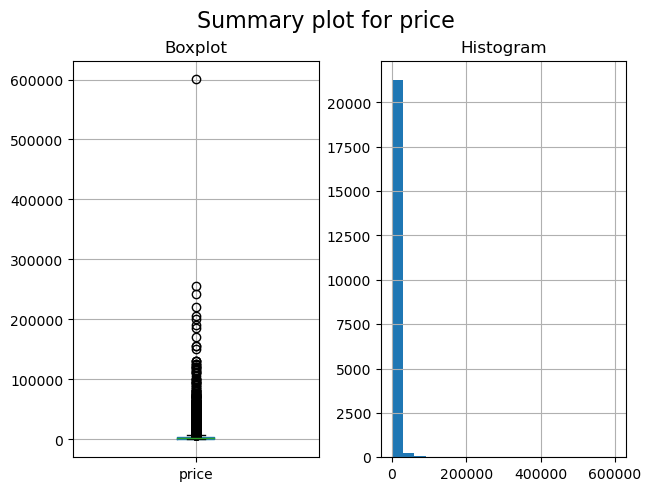

---

**review_scores_rating**

,min,median,max,mean,std,skewness,kurtosis
0,1.0,4.88,5.0,4.730171,0.479491,-4.455196,26.522137


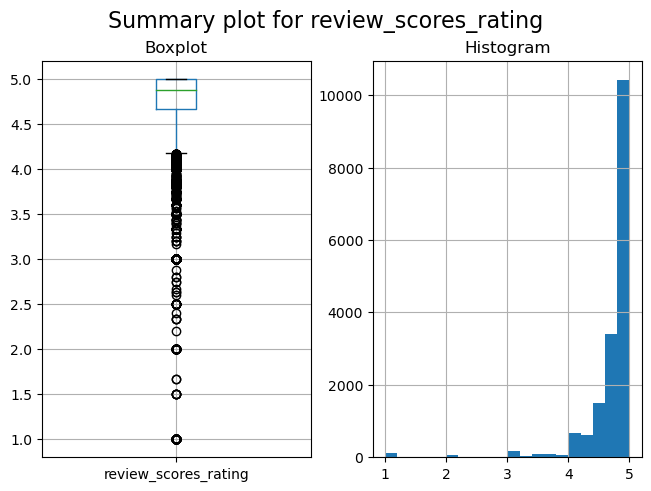

---

**review_scores_value**

,min,median,max,mean,std,skewness,kurtosis
0,0.0,4.83,5.0,4.696412,0.488549,-4.330161,25.513437


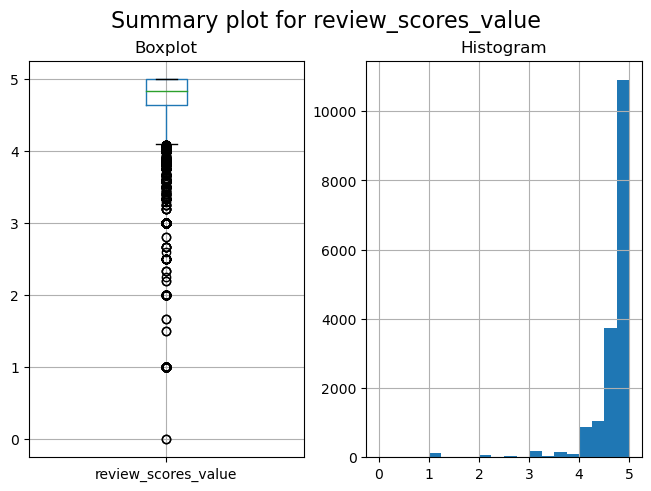

---

**host_response_rate**

,min,median,max,mean,std,skewness,kurtosis
0,0.0,1.0,1.0,0.94683,0.171009,-4.180558,18.007934


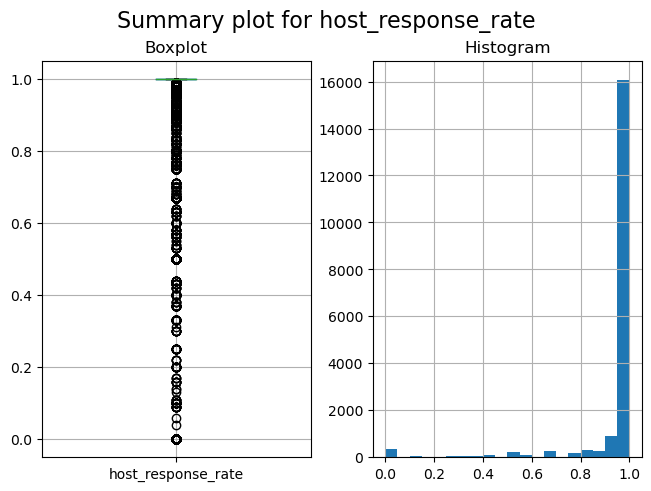

---

**host_acceptance_rate**

,min,median,max,mean,std,skewness,kurtosis
0,0.0,0.95,1.0,0.835384,0.259599,-2.082003,3.552405


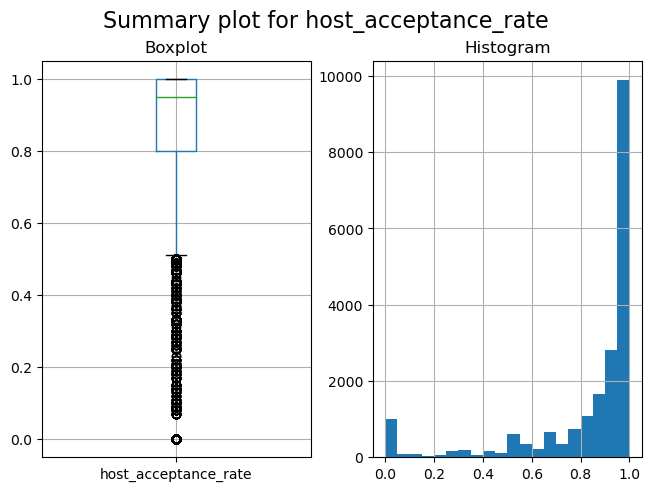

---

**accommodates**

,min,median,max,mean,std,skewness,kurtosis
0,1,3.0,16,3.820212,2.436073,1.665911,3.57097


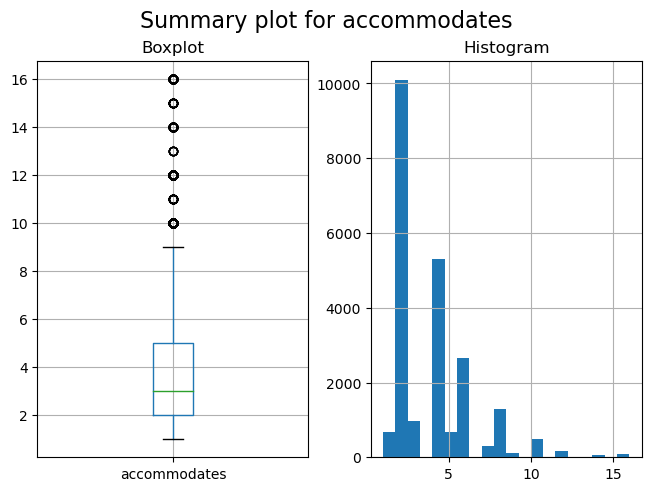

---

**beds**

,min,median,max,mean,std,skewness,kurtosis
0,1.0,2.0,50.0,2.357924,1.937851,5.355285,84.162451


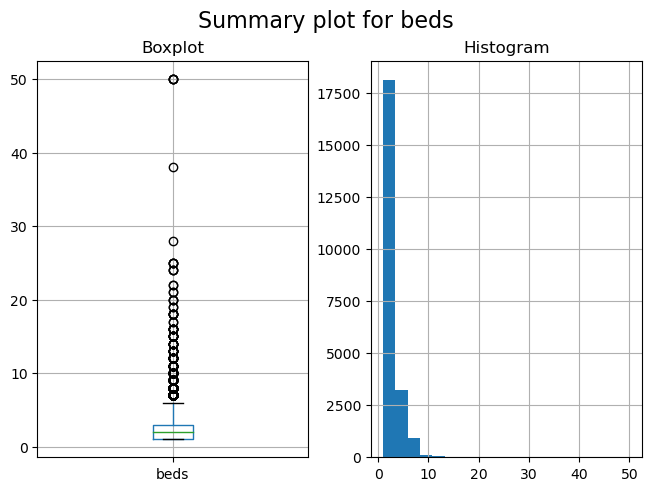

---

In [59]:
for col in selected_numeric_cols:
    display(Markdown(f'**{col}**'))
    display(pd.DataFrame({'min': [clean_df[col].min()], 'median': [clean_df[col].median()], 'max': [clean_df[col].max()], 'mean': [clean_df[col].mean()], 'std': [clean_df[col].std()], 'skewness': [clean_df[col].skew()], 'kurtosis': [clean_df[col].kurtosis()]}))
    fig = summary_plot(clean_df[[col]], f'Summary plot for {col}')
    plt.show()
    display(Markdown('---'))

Jak widać, mamy wiele outlierów o ekstremalnych wartościach, które zakrzywiają rozkład.

Widać to zwłaszcza w przypadku *price*, gdzie jest jedna wartość wynosząca 60000, zaś mediana wynosi 2000.

#### Wybrane zmienne kategoryczne

In [60]:
selected_categoric_cols = ['host_response_time', 'host_verifications', 'room_type']

**host_response_time**

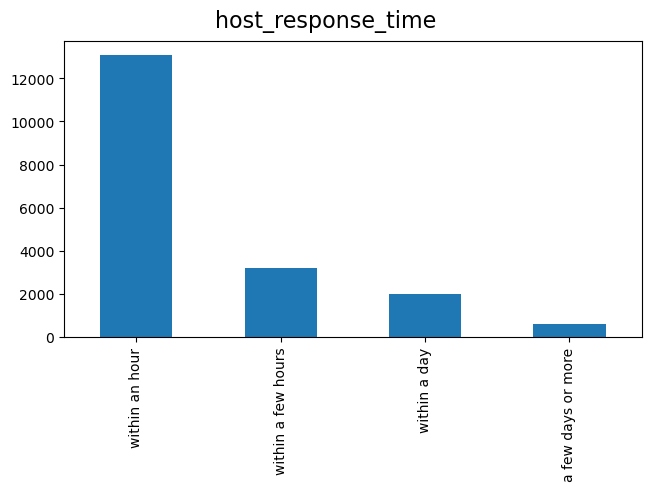

---

**host_verifications**

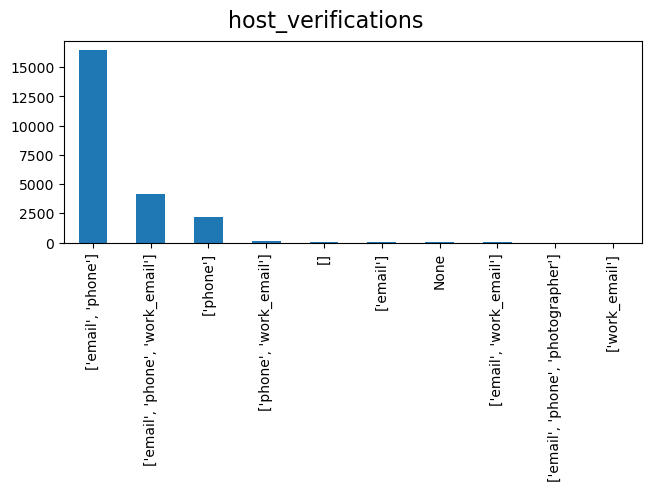

---

**room_type**

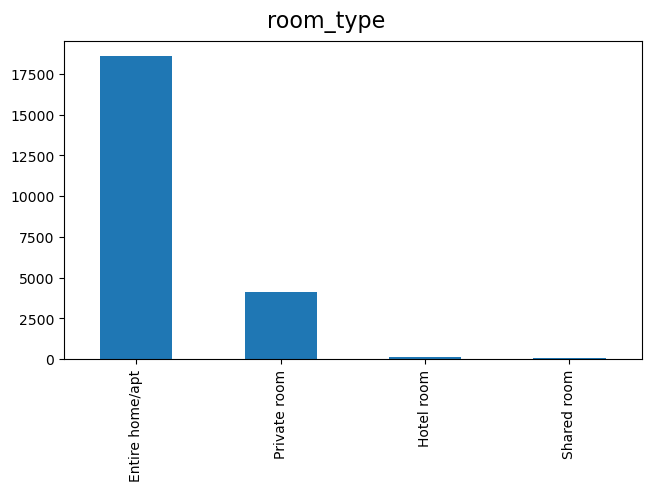

---

In [61]:
for col in selected_categoric_cols:
    display(Markdown(f'**{col}**'))
    fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained')
    clean_df[col].value_counts().plot(kind='bar', ax=ax)
    fig.suptitle(f'{col}', fontsize=16)
    plt.show()
    display(Markdown('---'))

## 8. Czyszczenie danych

#### Usunięcie niepotrzebnych kolumn

Oprócz już wymienionych kolumn, dodatkowo usuniemy następujące kolumny:
- *id*, *host_id*, *host_location*, *host_neighborhood*, *listing_url*, *host_url*, *host_name*, *host_thumbnail_url*, *host_picture_url*, *scrape_id*, *last_scraped*, *source*, *calendar_last_scraped*, *neighbourhood* - ogólnie niepotrzebne wartości 
- *amenities* - wszystkie wartości wynoszą [], więc jest to bezużyteczna kolumna.
- *picture_url* - wszystkie lokale mają zdjęcie i url nie jest nam potrzebnmy.

In [62]:
undesired_cols = [
    'id', 'host_id', 'host_location', 'host_neighbourhood', 'listing_url', 'host_url', 'host_name', 'picture_url', 'host_thumbnail_url',
    'host_picture_url', 'scrape_id', 'last_scraped', 'source', 'description', 'amenities', 'calendar_updated',
    'calendar_last_scraped', 'first_review', 'last_review', 'host_about', 'has_availability', 'neighborhood_overview',
    'neighbourhood_group_cleansed', 'license', 'neighbourhood'
]

In [63]:
clean_df = clean_df.drop(labels=undesired_cols, axis='columns').drop_duplicates()

In [64]:
clean_df.shape

(22953, 50)

#### Uzupełnienie braków w danych

Zostały nam następujące kolumny:

In [65]:
list(clean_df.columns)

['name',
 'host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_

Brakujące dane mamy dla następujących kolumn:

In [66]:
list(clean_df.isna().sum()[clean_df.isna().sum() > 0].index)

['host_since',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

Wpierw usuńmy rzędy tych, których brakuje bardzo mało:

In [67]:
clean_df = clean_df.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'beds', 'bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'])

In [68]:
clean_df.shape

(22357, 50)

Jak widać, odpadło nam około 600 wierszy.

Zajmijmy się teraz tymi kolumnami, w których chcemy uzupełnić braki:

In [69]:
def extract_bathrooms(bathroom_text: str):
    if 'half' in bathroom_text.lower():
        return 0.5
    else:
        return float(bathroom_text.split(' ')[0])
    
clean_df['bathrooms'] = clean_df['bathrooms_text'].map(extract_bathrooms).astype(np.float64)

In [70]:
def extract_bathroom_type(bathroom_text: str):
    if 'shared' in bathroom_text.lower():
        return 'shared'
    elif 'private' in bathroom_text.lower():
        return 'private'
    else:
        return 'generic'
    
clean_df['bathroom_type'] = clean_df['bathrooms_text'].map(extract_bathroom_type).astype('category')

In [71]:
def extract_bedrooms(row: pd.Series):
    room_type = row[0]
    property_type = row[1]
    accomodates = int(row[2])
    beds = int(row[3])
    if room_type.lower() in ['private room', 'hotel room', 'shared room']:
        return 1
    elif 'room' in property_type.lower():
        return 1
    elif property_type.lower() in ['barn', 'tent', 'shipping container', 'dome', 'camper/rv', 'treehouse', 'farm stay']:
        return 1
    else:
        return math.ceil(accomodates/beds)  # Zakładamy, że łóżko zawiera maks 2 osoby i że mamy jedno łóżko na pokój.

clean_df['bedrooms'] = clean_df[['room_type', 'property_type', 'accommodates', 'beds']].apply(extract_bedrooms, axis=1).astype(np.int64)

Teraz nie potrzebujemy już kolumny *bathroom_text* i możemy ją usunąć.

In [72]:
clean_df = clean_df.drop(labels=['bathrooms_text'], axis='columns').drop_duplicates()

Będziemy używać wartości najczęściej występujące, średnie lub mediany do uzupełnienia braków.

In [73]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [74]:
clean_df[['host_response_time']] = most_frequent_imputer.fit_transform(clean_df[['host_response_time']])

In [75]:
clean_df[['host_response_rate', 'host_acceptance_rate']] = median_imputer.fit_transform(clean_df[['host_response_rate', 'host_acceptance_rate']])

In [77]:
clean_df[['price']] = median_imputer.fit_transform(clean_df[['price']])
clean_df['price'] = clean_df['price']

In [78]:
clean_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']] = median_imputer.fit_transform(clean_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']])

Upewniamy się, że już nie mamy żadnych brakujących danych

In [79]:
(clean_df.isna().sum() > 0).any()

False

#### Pozbycie się outlierów

In [80]:
numeric_cols = clean_df.select_dtypes(include=[np.float64, np.int64]).columns
clean_df = clean_df[(np.abs(sp.stats.zscore(clean_df[numeric_cols])) < 3).all(axis=1)]

In [81]:
clean_df.shape

(16366, 50)

Okazuje się, że wycięcie wartości odległych o przynajmniej 3 standardowe odchylenia redukuje znacząco nasz zbiór danych, z 22300 na 16300.

## 9. Analiza zależności między zmiennymi

#### Macierz korelacji zmiennych numerycznych

In [82]:
numeric_corr_df = clean_df[numeric_cols].corr(method='pearson')
numeric_corr_df

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,1.000000,0.273001,-0.001462,-0.006251,0.002270,0.008585,-0.022302,-0.035169,0.041660,-0.012996,...,0.038865,0.015659,0.041183,0.001840,0.030155,0.005054,0.012125,-0.063815,NaN,0.074287
host_acceptance_rate,0.273001,1.000000,0.028917,0.020748,0.009306,0.009629,-0.066909,-0.080153,0.044101,-0.075096,...,0.018193,-0.056333,-0.023783,-0.039559,-0.018828,0.026534,0.031529,-0.056643,NaN,0.183465
host_listings_count,-0.001462,0.028917,1.000000,0.934741,0.087936,-0.140142,-0.002076,0.023875,0.127303,-0.044962,...,-0.080335,-0.159123,-0.196894,-0.096929,-0.141650,0.959324,0.952440,0.068706,NaN,0.148910
host_total_listings_count,-0.006251,0.020748,0.934741,1.000000,0.066399,-0.149600,0.029217,0.058158,0.131697,-0.012842,...,-0.072187,-0.134997,-0.172471,-0.079786,-0.133797,0.893528,0.889984,0.041121,NaN,0.122151
latitude,0.002270,0.009306,0.087936,0.066399,1.000000,0.005496,-0.132167,-0.107451,-0.004125,-0.152826,...,-0.053192,-0.083719,-0.073493,-0.059256,-0.053503,0.079135,0.073428,0.053244,NaN,0.046840
longitude,0.008585,0.009629,-0.140142,-0.149600,0.005496,1.000000,-0.062711,-0.105878,-0.122656,-0.017493,...,0.039914,0.043211,0.049036,-0.026448,0.073531,-0.142479,-0.150574,0.076345,NaN,-0.075855
accommodates,-0.022302,-0.066909,-0.002076,0.029217,-0.132167,-0.062711,1.000000,0.816658,0.340314,0.878943,...,-0.005112,0.062902,0.055871,0.074161,-0.007051,-0.010091,0.017408,-0.227622,NaN,-0.117720
bathrooms,-0.035169,-0.080153,0.023875,0.058158,-0.107451,-0.105878,0.816658,1.000000,0.224130,0.723408,...,0.015782,0.072540,0.064923,0.089982,0.002137,0.019985,0.038413,-0.148685,NaN,-0.127634
bedrooms,0.041660,0.044101,0.127303,0.131697,-0.004125,-0.122656,0.340314,0.224130,1.000000,0.119238,...,-0.027517,-0.057527,-0.044823,-0.009424,-0.055672,0.122075,0.185808,-0.522776,NaN,0.134236
beds,-0.012996,-0.075096,-0.044962,-0.012842,-0.152826,-0.017493,0.878943,0.723408,0.119238,1.000000,...,-0.008672,0.068009,0.061850,0.070258,0.002729,-0.051420,-0.028037,-0.192435,NaN,-0.141563


Dziwna sytuacja ma miejsce z *calculated_host_listings_count_shared_rooms*. Spójrzmy jak wyglądają wartości tej kolumny:

In [85]:
clean_df['calculated_host_listings_count_shared_rooms'].unique()

array([0], dtype=int64)

Rzeczywiście, kolumna ma tylko wartość 0 i wtedy kowariancja jej z innymi kolumnami będzie również wynosić 0:

In [86]:
(clean_df[numeric_cols].cov()['calculated_host_listings_count_shared_rooms'] == 0).all()

True

Spójrzmy jak te korelacje przedstawiają się na wykresie:

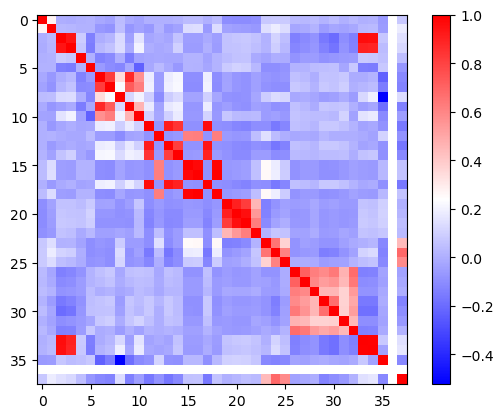

In [83]:
plt.imshow(numeric_corr_df, cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.show()

Widać, że poza przekątną są zmienne, które silnie lub znacząco ze sobą korelują.
                   
Zasadnicza większość jednak koreluje słabo lub w ogóle. 

Zakładając, że interesują nas korelacje na poziomie 0.4, to następujące kolumny korelują z przynajmniej jedną inną:

In [84]:
(numeric_corr_df.abs() > 0.4).sum()[(numeric_corr_df.abs() > 0.4).sum() > 1]

host_listings_count                             4
host_total_listings_count                       4
accommodates                                    4
bathrooms                                       4
bedrooms                                        2
beds                                            4
price                                           4
minimum_nights                                  4
maximum_nights                                  4
minimum_minimum_nights                          4
maximum_minimum_nights                          4
minimum_maximum_nights                          4
maximum_maximum_nights                          4
minimum_nights_avg_ntm                          4
maximum_nights_avg_ntm                          4
availability_30                                 4
availability_60                                 4
availability_90                                 4
availability_365                                4
number_of_reviews                               3


Zwizualizujmy to za pomocą *pair plots*. Zmiennych jest jednak za dużo (38), by wykres był czytelny, więc wybieram podzbiór cech numerycznych, który wydaje mi się ciekawy:

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='host_response_rate', ylabel='price'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='price'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='host_response_rate'>,
        <AxesSubplot:xlabel='host_response_rate', ylabel='host_response_rate'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='host_response_rate'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='host_response_rate'>],
       [<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='host_response_rate', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='number_of_reviews'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='number_of_reviews'>],
       [<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>,
        <AxesSubplot:xlabel='host_response_rate', ylabel='re

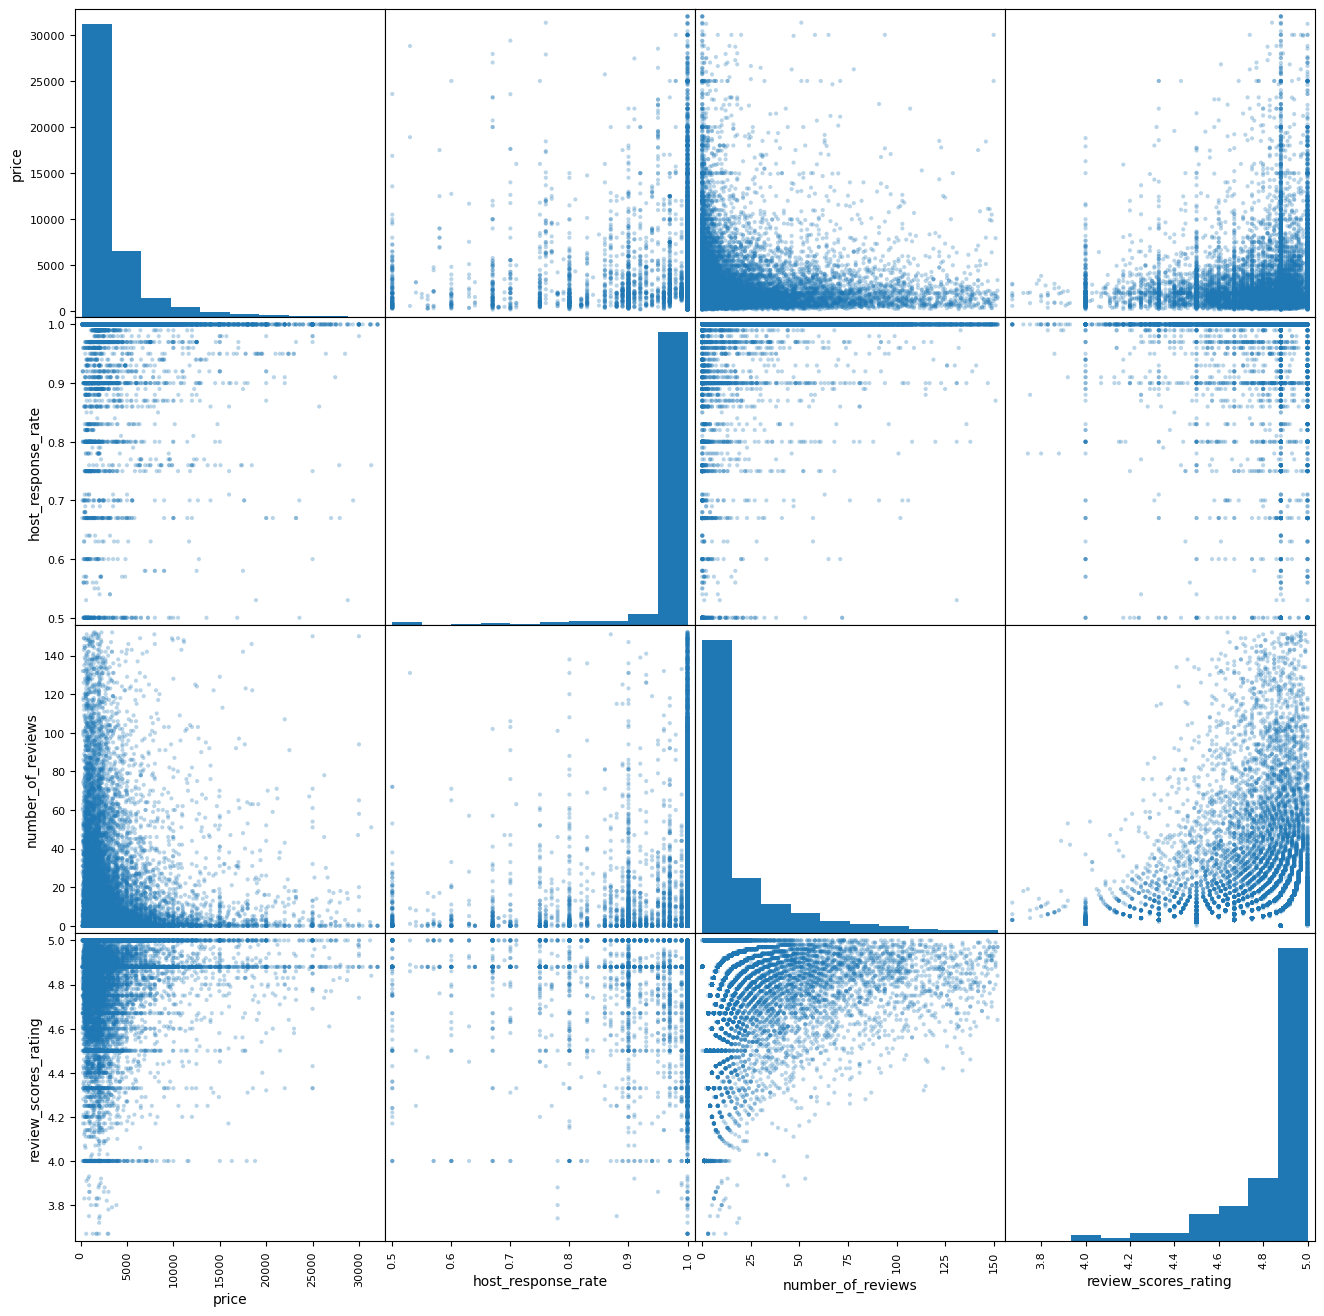

In [101]:
selected_numeric_cols = ['price', 'host_response_rate', 'number_of_reviews', 'review_scores_rating']
fig_array = pd.plotting.scatter_matrix(clean_df[selected_numeric_cols], alpha=0.3, figsize=(16, 16), diagonal='hist')
display(fig_array)

#### Badanie zależności między zmiennymi kategorycznymi

In [88]:
categoric_cols = list(clean_df.select_dtypes(include=['category']).columns)

Najpierw policzmy statystykę Crammera:

In [89]:
#  źródło: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [90]:
cramers_coeffs = {}
for col1 in categoric_cols:
    cramers_coeffs[col1] = {}
    for col2 in categoric_cols:
        confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
        cramers_coeff = cramers_corrected_stat(confusion_matrix)
        cramers_coeffs[col1][col2] = cramers_coeff

In [91]:
cramers_coeff_df = pd.DataFrame(cramers_coeffs)
cramers_coeff_df

,host_verifications,neighbourhood_cleansed,property_type,room_type,bathroom_type
host_verifications,1.000000,0.029752,0.030852,0.030569,0.022081
neighbourhood_cleansed,0.029752,1.000000,0.126155,0.187765,0.187807
property_type,0.030852,0.126155,1.000000,0.949606,0.616822
room_type,0.030569,0.187765,0.949606,1.000000,0.583118
bathroom_type,0.022081,0.187807,0.616822,0.583118,1.000000


Następnie spójrzmy na zależności między wybranymi zmiennymi kategorycznymi a numerycznymi.

Musimy jednak zamienić dane kategoryczne na numeryczne np. za pomocą one-hot-encoding.

In [92]:
train_df = clean_df[['property_type', 'price']].copy()

In [93]:
one_hot_df = pd.get_dummies(train_df['property_type'])

In [94]:
train_df = train_df.drop('property_type', axis = 1)

In [95]:
train_df = train_df.join(one_hot_df)

Teraz możemy policzyć liniową regresją na tych danych.

In [96]:
linreg_model = LinearRegression()
linreg_model.fit(train_df[clean_df['property_type'].unique()], train_df['price'])
linreg_model.score(train_df[clean_df['property_type'].unique()], train_df['price'])

0.2428304857324569

Jak widać, R2 jest małe, choć nie jest ono zaniedbywalne.

Pozostaje nam zwizualizować związki między zmiennymi kategorycznymi, a zamiennymi numerycznymi.

Pod lupę weźmiemy z jednej strony *price* a z drugiej *room_type*.

In [97]:
subset_df = clean_df[['room_type', 'price']]

<AxesSubplot:>

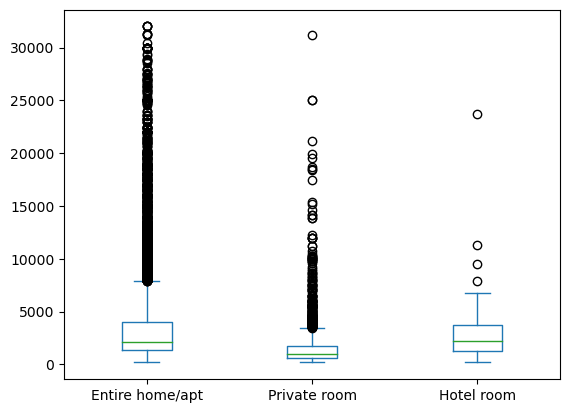

In [98]:
subset_df.assign(index=subset_df.groupby('room_type').cumcount()).pivot('index', 'room_type', 'price').plot(kind='box')

Co ciekawe, widać, że najwięcej outlierów jest w kategorii *Entire home/apt*.

Z kolei, kategoria *Hotel room* ma bardzo mało outlierów.

Jak się okazuje, jest to związane z małą liczbą pokoi hotelowych:

In [99]:
subset_df['room_type'].value_counts()

Entire home/apt    13545
Private room        2714
Hotel room           107
Shared room            0
Name: room_type, dtype: int64